<a href="https://colab.research.google.com/github/Bo-Ni/ProtBert_Notebook_set_0/blob/main/USDA_May_17_Divide_Sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# =================================================================
# 0. prepare the packages
# =================================================================
import os
# #if running colab or if you want to use GPU on a local machine, comment out this line
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
import pandas as pd

import math

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

#
# import matplotlib 
# matplotlib.use('Agg')
#
import matplotlib.pyplot as plt
from matplotlib import rc

In [22]:
IF_Google = 1
IF_Debug = 1

In [3]:
# =================================================================
# 1. check the GPU set-up
# =================================================================
# Not work for .py file

if IF_Google == 1:
  print(os.popen('nvidia-smi').read())

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.




In [23]:
csv_ecoli_pair = 'ecoli_pair_seq12_interact.csv'

In [6]:
if IF_Google == 1:
  file_exist_1 = os.path.exists(csv_ecoli_pair)


  if not (file_exist_1 ):
    # download files
    print(os.popen('wget https://www.dropbox.com/s/kesvrpv4cyfmpwe/ecoli_pair_seq12_interact.csv').read())
    # print(os.popen('wget https://www.dropbox.com/s/jvmcukfl571mxk6/uniprot_fgfr_reviewed.xlsx').read())
    
    # print(os.popen('wget https://www.dropbox.com/s/4rqairjn72t07ao/uniprot_fgf_unreviewed.xlsx').read())
    # print(os.popen('wget https://www.dropbox.com/s/8utuj3dcxrmmrc6/uniprot_fgfr_unreviewed.xlsx').read())
    # # move the file
    # print(os.popen('mkdir homemade_metric_classification_accuracy').read())
    # print(os.popen('mv homemade_metric_classification_accuracy.py ./homemade_metric_classification_accuracy').read())

In [24]:
df_raw_ecoli  = pd.read_csv(csv_ecoli_pair)

In [25]:
df_raw_ecoli.head(5)

,Protein1,Protein2,Interaction,Probability,Seq_1,Seq_2
0,P31475,P0ACL9,1,0.999977,MPLSAQQLAAQKNLSYVLAEKLAQRILKGEYEPGTILPGEIELGEQ...,MAYSKIRQPKLSDVIEQQLEFLILEGTLRPGEKLPPERELAKQFDV...
1,P0ACP7,P0ACQ0,1,0.999977,MATIKDVAKRANVSTTTVSHVINKTRFVAEETRNAVWAAIKELHYS...,MATMKDVARLAGVSTSTVSHVINKDRFVSEAITAKVEAAIKELNYA...
2,P52696,Q47141,1,0.999958,MKHELSSMKAFVILAESSSFNNAAKLLNITQPALTRRIKKMEEDLH...,MELRHLRYFVAVAQALNFTRAAEKLHTSQPSLSSQIRDLENCVGVP...
3,Q47141,P23841,1,0.999946,MELRHLRYFVAVAQALNFTRAAEKLHTSQPSLSSQIRDLENCVGVP...,MERVYRTDLKLLRYFLAVAEELHFGRAAARLNMSQPPLSIHIKELE...
4,P52696,P0ACR7,1,0.999945,MKHELSSMKAFVILAESSSFNNAAKLLNITQPALTRRIKKMEEDLH...,MNYSLKQLKVFVTVAQEKSFSRAGERIGLSQSAVSHSVKELENHTG...


In [26]:
print(len(df_raw_ecoli))

39892


In [33]:
# add length into the set
print( len(df_raw_ecoli["Seq_1"][0]) )
print( len(df_raw_ecoli.Seq_1[0]) )
print( len(df_raw_ecoli.Seq_2[0]) )

230
230
254


In [32]:
df_raw_ecoli['Seq_1_Len'] = df_raw_ecoli.apply(lambda row: len(row.Seq_1), axis = 1)
df_raw_ecoli['Seq_2_Len'] = df_raw_ecoli.apply(lambda row: len(row.Seq_2), axis = 1)

In [16]:
#df_raw_ecoli = df_raw_ecoli.assign(Seq_1_Len=lambda x: len(x.Seq_1))

In [34]:
print( df_raw_ecoli["Seq_1_Len"][0] )
print( df_raw_ecoli["Seq_2_Len"][0] )

230
254


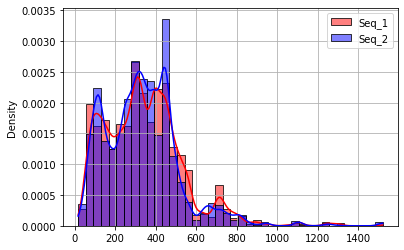

In [35]:
# distribution in sequence length
# check the distribution of the picked ones
plt.figure()
sns.histplot(df_raw_ecoli.Seq_1_Len.values, 
             bins=40, kde=True, stat='density', color="red", label="Seq_1");
sns.histplot(df_raw_ecoli.Seq_2_Len.values, 
             bins=40, kde=True, stat='density', color="blue", label="Seq_2");

plt.grid()
plt.legend() 
plt.show()

In [36]:
# make an even size sets
# 1. divide into 0 and 1 interactions
df_ecoli_pair_Posi = df_raw_ecoli.loc[df_raw_ecoli['Interaction'] == 1]
df_ecoli_pair_Nega = df_raw_ecoli.loc[df_raw_ecoli['Interaction'] == 0]


254


In [38]:
print(len(df_ecoli_pair_Posi))
print(len(df_ecoli_pair_Nega))
print( len(df_ecoli_pair_Posi)/len(df_ecoli_pair_Nega) )

254
39638
0.006407992330591856


In [39]:
# 2. made a equal weighted mixture
df_ecoli_pair_Posi_Pick = df_ecoli_pair_Posi
df_ecoli_pair_Nega_Pick = df_ecoli_pair_Nega.sample(len(df_ecoli_pair_Posi))

In [40]:
print(len(df_ecoli_pair_Posi_Pick))
print(len(df_ecoli_pair_Nega_Pick))

254
254


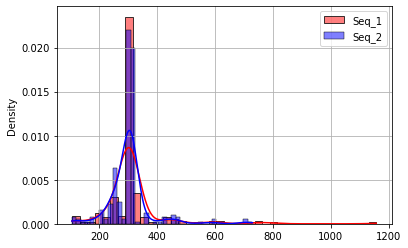

In [41]:
plt.figure()
sns.histplot(df_ecoli_pair_Posi_Pick.Seq_1_Len.values, 
             bins=40, kde=True, stat='density', color="red", label="Seq_1");
sns.histplot(df_ecoli_pair_Posi_Pick.Seq_2_Len.values, 
             bins=40, kde=True, stat='density', color="blue", label="Seq_2");

plt.grid()
plt.legend() 
plt.show()

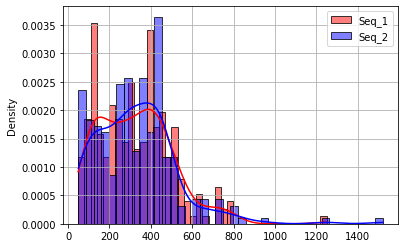

In [42]:
plt.figure()
sns.histplot(df_ecoli_pair_Nega_Pick.Seq_1_Len.values, 
             bins=40, kde=True, stat='density', color="red", label="Seq_1");
sns.histplot(df_ecoli_pair_Nega_Pick.Seq_2_Len.values, 
             bins=40, kde=True, stat='density', color="blue", label="Seq_2");

plt.grid()
plt.legend() 
plt.show()

In [43]:
# divide into three groups
def divide_into_three_sets(df,trai_ratio):
  df_trai = df.sample( frac=trai_ratio )
  df_vali_test = df.drop( df_trai.index )

  df_vali = df_vali_test.sample( frac=0.5 )
  df_test = df_vali_test.drop( df_vali.index )

  return df_trai,df_vali,df_test

In [44]:
# ration between groups: 80% + 10% +10%
training_ratio = 0.70

df_ecoli_pair_Posi_Pick_trai, \
df_ecoli_pair_Posi_Pick_vali, \
df_ecoli_pair_Posi_Pick_test = \
  divide_into_three_sets( df_ecoli_pair_Posi_Pick,training_ratio)

print(len( df_ecoli_pair_Posi_Pick_trai))
print(len( df_ecoli_pair_Posi_Pick_test))
print(len( df_ecoli_pair_Posi_Pick_vali))

178
38
38


In [45]:
df_ecoli_pair_Nega_Pick_trai, \
df_ecoli_pair_Nega_Pick_vali, \
df_ecoli_pair_Nega_Pick_test = \
  divide_into_three_sets( df_ecoli_pair_Nega_Pick,training_ratio)

print(len( df_ecoli_pair_Nega_Pick_trai))
print(len( df_ecoli_pair_Nega_Pick_test))
print(len( df_ecoli_pair_Nega_Pick_vali))

178
38
38


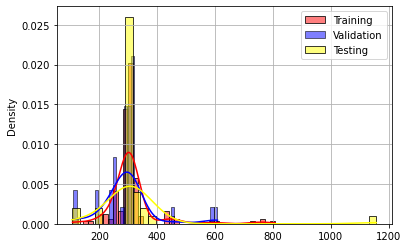

In [48]:
# compare the three sets:
plt.figure()
sns.histplot(df_ecoli_pair_Posi_Pick_trai.Seq_1_Len.values, 
             bins=40, kde=True, stat='density', color="red", label="Training");
sns.histplot(df_ecoli_pair_Posi_Pick_vali.Seq_1_Len.values, 
             bins=40, kde=True, stat='density', color="blue", label="Validation");
sns.histplot(df_ecoli_pair_Posi_Pick_test.Seq_1_Len.values, 
             bins=40, kde=True, stat='density', color="yellow", label="Testing");

plt.grid()
plt.legend() 
plt.show()

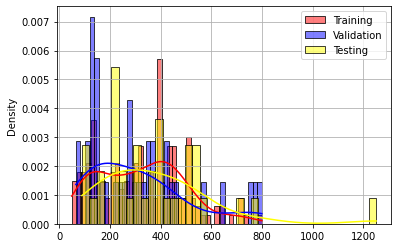

In [49]:
plt.figure()
sns.histplot(df_ecoli_pair_Nega_Pick_trai.Seq_1_Len.values, 
             bins=40, kde=True, stat='density', color="red", label="Training");
sns.histplot(df_ecoli_pair_Nega_Pick_vali.Seq_1_Len.values, 
             bins=40, kde=True, stat='density', color="blue", label="Validation");
sns.histplot(df_ecoli_pair_Nega_Pick_test.Seq_1_Len.values, 
             bins=40, kde=True, stat='density', color="yellow", label="Testing");

plt.grid()
plt.legend() 
plt.show()

In [50]:
# mix the two parts
def mix_two_df(df_0, df_1):
  df_tot = pd.concat([df_0, df_1])
  df_tot = df_tot.sample(frac=1.0)
  return df_tot

In [51]:
df_ecoli_pair_Pick_trai = mix_two_df(df_ecoli_pair_Posi_Pick_trai,df_ecoli_pair_Nega_Pick_trai)
df_ecoli_pair_Pick_vali = mix_two_df(df_ecoli_pair_Posi_Pick_vali,df_ecoli_pair_Nega_Pick_vali)
df_ecoli_pair_Pick_test = mix_two_df(df_ecoli_pair_Posi_Pick_test,df_ecoli_pair_Nega_Pick_test)


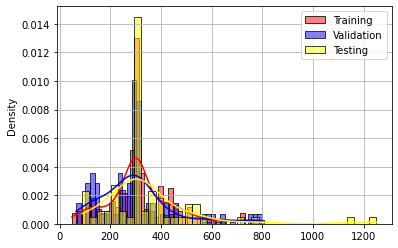

In [52]:
# d. prepare the figures for the statistics of the mixed sets
plt.figure()

sns.histplot(df_ecoli_pair_Pick_trai.Seq_1_Len.values, 
             bins=40, kde=True, stat='density', color="red", label="Training");
sns.histplot(df_ecoli_pair_Pick_vali.Seq_1_Len.values, 
             bins=40, kde=True, stat='density', color="blue", label="Validation");
sns.histplot(df_ecoli_pair_Pick_test.Seq_1_Len.values, 
             bins=40, kde=True, stat='density', color="yellow", label="Testing");

plt.grid()
plt.legend() 
plt.show()

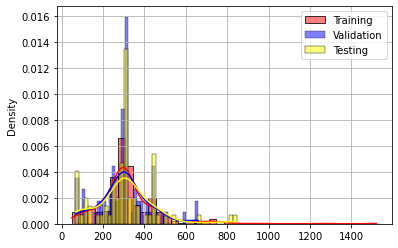

In [53]:
plt.figure()

sns.histplot(df_ecoli_pair_Pick_trai.Seq_2_Len.values, 
             bins=40, kde=True, stat='density', color="red", label="Training");
sns.histplot(df_ecoli_pair_Pick_vali.Seq_2_Len.values, 
             bins=40, kde=True, stat='density', color="blue", label="Validation");
sns.histplot(df_ecoli_pair_Pick_test.Seq_2_Len.values, 
             bins=40, kde=True, stat='density', color="yellow", label="Testing");

plt.grid()
plt.legend() 
plt.show()

In [54]:
# write to file
Result_path='./drive/MyDrive/0_data_prepare_results/'

In [55]:
# write into csv files
csv_ecoli_pair_Pick_trai = Result_path+'ecoli_pair_Pick_trai.csv'
csv_ecoli_pair_Pick_vali = Result_path+'ecoli_pair_Pick_vali.csv'
csv_ecoli_pair_Pick_test = Result_path+'ecoli_pair_Pick_test.csv'


In [56]:
df_ecoli_pair_Pick_trai.to_csv(csv_ecoli_pair_Pick_trai,
                             sep=',',index=False,encoding='utf-8')
df_ecoli_pair_Pick_vali.to_csv(csv_ecoli_pair_Pick_vali,
                             sep=',',index=False,encoding='utf-8')
df_ecoli_pair_Pick_test.to_csv(csv_ecoli_pair_Pick_test,
                             sep=',',index=False,encoding='utf-8')
